In [2]:
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import numpy as np
import pandas as pd
import scipy.stats as stats

import scipy
import pywt
import mne
import math

import sys
from tqdm import tqdm


sys.path.append('../utils')
from ERP_utils import *
from update_sub_lists import *
from wavelet_utils import *
from stats_utils import *
import glob
import os


import seaborn as sns
import warnings

# Suppress all FutureWarnings
warnings.simplefilter(action='ignore', category=FutureWarning)

### Wavelet for multiple subjects listen and motor

Parameters

In [3]:
task = 'listen'
ch_to_visualize = ['Cz']

wavelet_dir = f'/Users/cindyzhang/Documents/M2/Audiomotor_Piano/AM-EEG/wavelet/wavelets_mat_{task}__n05to05_30Hz_all_ave_freq'
subjects_to_process = find_existing_subjects(wavelet_dir)

good_listen_subjects, good_motor_subjects, musicians, nonmusicians = load_subject_lists()

print('processing subjects', subjects_to_process)

wavelet_trans_info = loadmat(os.path.join(wavelet_dir,f'wavelet_record.mat'))
times = wavelet_trans_info['times'].squeeze()
freqs = wavelet_trans_info['freqs'].squeeze()

processing subjects ['01', '02', '03', '04', '05', '06', '07', '08', '09', '10', '11', '12', '13', '14', '15', '16', '17', '18', '19', '20', '21']


In [4]:
data_ave = loadmat('/Users/cindyzhang/Documents/M2/Audiomotor_Piano/AM-EEG/wavelet/wavelets_mat_motor__n05to05_30Hz_all_ave_time/ave_motor_wavelet_post_10.mat')
wav_ave = data_ave['wavelet_transform']

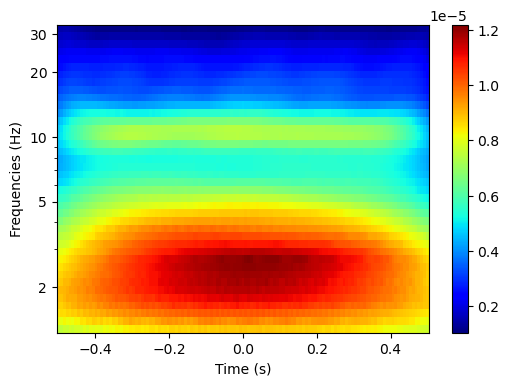

In [5]:
plot_scaleogram(wav_ave[37, :,:], freqs, times)

In [6]:
data = loadmat('/Users/cindyzhang/Documents/M2/Audiomotor_Piano/AM-EEG/wavelet/wavelets_mat_motor__n05to05_30Hz_all_time/motor_wavelet_post_10.mat')
wav_ex = data['wavelet_transform']


In [7]:
wav_ex_sub = wav_ex[1:4]
wav_ex_sub.shape

(3, 64, 40, 129)

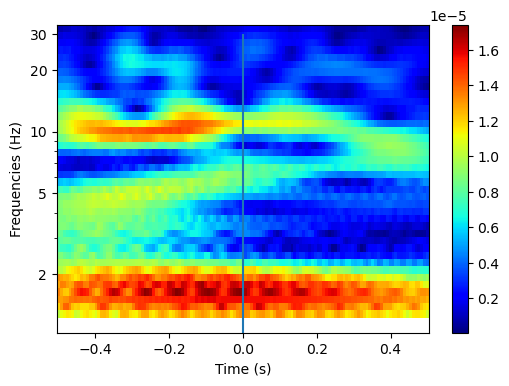

In [11]:
plot_scaleogram(wav_ex_sub[2,37,:,:], freqs, times)
plt.vlines(0,0,30)

##### Initialize directories

In [5]:
def scaleogram_sub_ave(subjects_to_process, wavelet_dir, ch_to_process = 'all'):
    """
    Reads ave_listen_wavelet_period_subject.mat files which already have the average wavelet stored
        under ['wavelet_transform'] in an array of shape n_ch x n_freqs x n_times (64x40x129)

    ch_to_process: 'all' or a list of channels. Takes if multiple channels are included. 
    
    ---
    returns wavelet_ave: ave spectrogram across all subjects of shape n_freqs x n_times


    """
    info_path = os.path.join(wavelet_dir, "wavelet_record.mat")
    wavelet_trans_info = loadmat(info_path)
    freqs = wavelet_trans_info['freqs'][0]
    
    return cwtmatr_ave